In [1]:
#use new Venom dataset using random forest classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#read data
print("Reading data...")
data = pd.read_csv('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new.csv')

#Show the contents of the data
print("Data contents:")
print(data.head())

#Show the shape of the data
print("Data shape:")
print(data.shape)

#Show the data types
print("Data types:")
print(data.dtypes)


Reading data...
Data contents:
                binomial                   country      continent  \
0    Laticauda colubrina                   unknown        unknown   
1  Heterodon platirhinos  United States of America  North America   
2       Corallus caninus                   unknown        unknown   
3  Masticophis taeniatus  United States of America  North America   
4         Python molurus                   unknown        unknown   

         genus      family                              UUID       source  \
0    Laticauda    Elapidae  51721fa2ab22484c96e2c5a5ab1d73f5  inaturalist   
1    Heterodon  Colubridae  2272576a97a046e29d6f6506eee455e1   herpmapper   
2     Corallus      Boidae  481ccac09eea45fdaddef74ac69879d2       flickr   
3  Masticophis  Colubridae  5e1cf4ab4a3344d38a85615b3da7ef76  inaturalist   
4       Python  Pythonidae  520ccd6ff89140e0941398c52eae5d05       flickr   

  subset  class_id                                         image_path  \
0  train     368.0

In [2]:
#All the image are jpg file and have different size, so we need to resize them
#All images are located in new-venom folder and new-non-venom folder
#Import opencv library
import cv2
import os
import glob

# Importing data into a Pandas Dataframe

In [3]:


#Create a function to read and resize images
def read_and_process_image(image):
    #Read the image using cv2
    image = cv2.imread(image, cv2.IMREAD_COLOR)
    #Resize the image to 100,100
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)
    #Return the image
    return image

#Get the image location
train_images = []
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-venom/*.jpg'):
    train_images.append(i)
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-non-venom/*.jpg'):
    train_images.append(i)

#Get the image label
train_labels = []
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-venom/*.jpg'):
    train_labels.append('venom')
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-non-venom/*.jpg'):
    train_labels.append('non-venom')

#Create a list to store the images after resizing
train_data = []
#For loop to read and resize the images
for i in train_images:
    #Read and resize the image
    img = read_and_process_image(i)
    #Append the image to the train_data list
    train_data.append(img)

#Convert the list to numpy array
train_data = np.array(train_data)

#Check the shape of the train data
print("Train data shape:")
print(train_data.shape)

#Check the shape of the train labels
print("Train labels shape:")
print(len(train_labels))

#Check the unique labels
print("Unique labels:")
print(np.unique(train_labels))

#Check the number of unique labels
print("Number of unique labels:")
print(len(np.unique(train_labels)))

#Convert the labels to numpy array
train_labels = np.array(train_labels)




Train data shape:
(2000, 100, 100, 3)
Train labels shape:
2000
Unique labels:
['non-venom' 'venom']
Number of unique labels:
2


# Random Forest Classifier

In [4]:
#Use train_labels and train_data numpy to train the model
#Split the data into train, test and validation set
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)

#Check the shape of the train and test data
print("Train data shape:")
print(X_train.shape)
print("Test data shape:")
print(X_test.shape)


Train data shape:
(1800, 100, 100, 3)
Test data shape:
(200, 100, 100, 3)


In [5]:
#Reshape the train and test data into 2D array
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

#Check the shape of the train and test data
print("Train data shape:")
print(X_train.shape)
print("Test data shape:")
print(X_test.shape)


Train data shape:
(1800, 30000)
Test data shape:
(200, 30000)


In [6]:
#Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model
clf.fit(X_train, y_train)

#Predict the values for test data
y_pred = clf.predict(X_test)

#Check the accuracy of the model
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))

#Check the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

#Check the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy of the model:
0.665
Confusion matrix:
[[129   5]
 [ 62   4]]
Classification report:
              precision    recall  f1-score   support

   non-venom       0.68      0.96      0.79       134
       venom       0.44      0.06      0.11        66

    accuracy                           0.67       200
   macro avg       0.56      0.51      0.45       200
weighted avg       0.60      0.67      0.57       200



In [7]:
import seaborn as sns

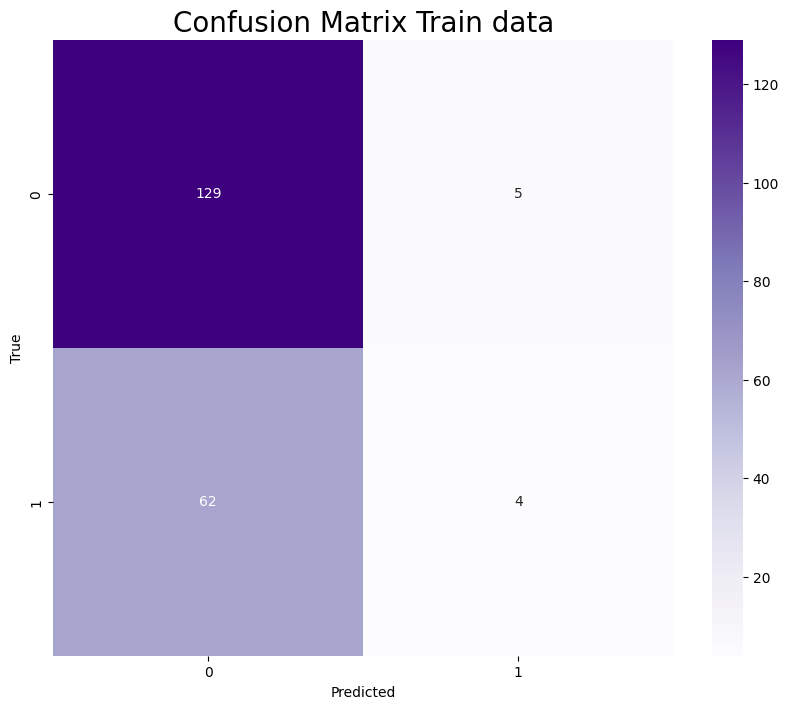

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix Train data', size=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#using grid search to find the best parameter
#Create a dictionary of parameters
param_grid = {'n_estimators': [200, 300, 400], 'max_depth': [4, 5, 6]}
#Create a grid search cv
grid_search = GridSearchCV(clf, param_grid, cv=5)
#Fit the grid search cv with train data
grid_search.fit(X_train, y_train)
#Get the best parameters
print("Best parameters:")
print(grid_search.best_params_)
#Get the best score
print("Best score:")
print(grid_search.best_score_)
#Get the best estimator
print("Best estimator:")
print(grid_search.best_estimator_)
#Predict the values for test data
y_pred = grid_search.predict(X_test)

In [ ]:
#Check the accuracy of the model
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))

#Check the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

#Check the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix Train data', size=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Reshape data for logistic regression
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)


# Initialize the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000) 

# Train the model
logistic_reg.fit(X_train_flatten, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(X_test_flatten)

#Check the accuracy of the model
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))

#Check the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

#Check the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix Train data', size=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# CNN

In [ ]:
#Create a function to read and resize images to 250x250
def read_and_process_image(image):
    #Read the image using cv2
    image = cv2.imread(image, cv2.IMREAD_COLOR)
    #Resize the image to 100,100
    image = cv2.resize(image, (250, 250), interpolation=cv2.INTER_CUBIC)
    #Return the image
    return image

#Get the image location
train_images = []
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-venom/*.jpg'):
    train_images.append(i)
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-non-venom/*.jpg'):
    train_images.append(i)

#Get the image label
train_labels = []
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-venom/*.jpg'):
    train_images.append(i)
for i in glob.glob('/kaggle/input/d/jhoang/venomous-or-not-reviewed/newKaggleRefrence/new-non-venom/*.jpg'):
    train_images.append(i)

#Create a list to store the images after resizing
train_data = []
#For loop to read and resize the images
for i in train_images:
    #Read and resize the image
    img = read_and_process_image(i)
    #Append the image to the train_data list
    train_data.append(img)

#Convert the list to numpy array
train_data = np.array(train_data)

#Check the shape of the train data
print("Train data shape:")
print(train_data.shape)

#Check the shape of the train labels
print("Train labels shape:")
print(len(train_labels))

#Check the unique labels
print("Unique labels:")
print(np.unique(train_labels))

#Check the number of unique labels
print("Number of unique labels:")
print(len(np.unique(train_labels)))

#Convert the labels to numpy array
train_labels = np.array(train_labels)




In [ ]:
#CNN model
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)

In [ ]:
#Now we want to use CNN to train the model
#Import keras library
import keras
#Import the sequential model
from keras.models import Sequential
#Import the layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
#Import the optimizer
from keras.optimizers import Adam

In [ ]:
#Preprocess the labels for cnn
#Import the label encoder
from sklearn.preprocessing import LabelEncoder
#Create an object of the label encoder class
label_encoder = LabelEncoder()
#Fit and transform the labels
y_train = label_encoder.fit_transform(y_train)
#Fit and transform the labels
y_test = label_encoder.fit_transform(y_test)
#Convert the labels to categorical
y_train = keras.utils.to_categorical(y_train, 2)
#Convert the labels to categorical
y_test = keras.utils.to_categorical(y_test, 2)


In [ ]:
#The model is still overfitting, so we need to add more dropout layer to reduce overfitting
#Create a sequential model
model = Sequential()
#Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
#Add the max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add the second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
#Add the max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add the third convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
#Add the max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add the flatten layer
model.add(Flatten())
#Add the first dense layer
model.add(Dense(units=128, activation='relu'))
#Add the dropout layer
model.add(Dropout(0.5))
#Add Flatten layer
model.add(Flatten())
#Add dropout layer
model.add(Dropout(0.5))
#Add the second dense layer
model.add(Dense(units=2, activation='softmax'))

#Print the model summary
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
#Print the model summary
print(model.summary())

#Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [ ]:
#print model test and train accuracy history
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test.shape

In [ ]:
# predictions on the train set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix Test data', size=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Convert the confusion matrix to a Pandas DataFrame for better visualization
train_confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
print(train_confusion_df)